In [1]:
using IntervalConstraintProgramming, ValidatedNumerics

In [2]:
disc1 = @constraint x^2 + y^2 <= 0.125
disc2 = @constraint (x-1)^2 + y^2 <= 0.125
disc3 = @constraint (x-1)^2 + (y-1)^2 <= 0.125
disc4 = @constraint x^2 + (y-1)^2 <= 0.125

# x_domain = @constraint 0 <= x <= 1
# y_domain = @constraint 0 <= y <= 1

# configuration_space = (x_domain ∩ y_domain) ∩ !(disc1 ∪ disc2 ∪ disc3 ∪ disc4)
configuration_space = !(disc1 ∪ disc2 ∪ disc3 ∪ disc4)

Separator with variables x, y

In [3]:
X = IntervalBox(0..1, 0..1)
@time inner, boundary = pave(configuration_space, X, 0.01);

  1.506502 seconds (4.55 M allocations: 158.780 MB, 4.58% gc time)


In [4]:
include("draw_boxes.jl")

/Users/dpsanders/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


draw (generic function with 5 methods)

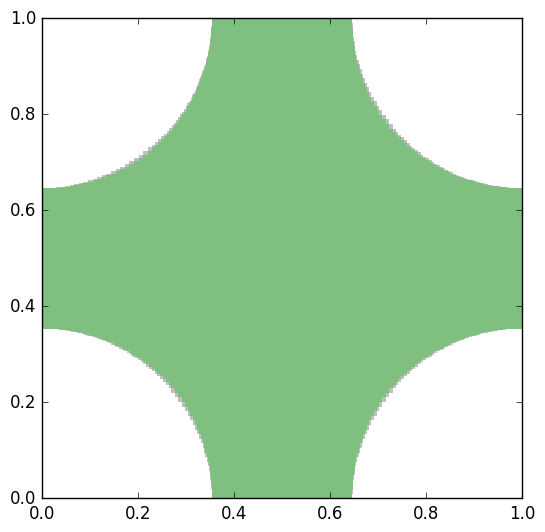

(-5.551115123125783e-17,1.0,0.0,1.0)

In [5]:
draw(inner, "green", 0.5, 0); draw(boundary, "grey", 0.5)

In [4]:
angle_domain = @constraint -1 <= sinθ <= 1

Separator with variables sinθ

In [5]:
phase_space = configuration_space ∩ angle_domain

Separator with variables sinθ, x, y

In [38]:
Y = IntervalBox(-1..1, 0..1, 0..1)
@time inner2, boundary2 = pave(phase_space, Y, 0.01);

145.724099 seconds (1.07 G allocations: 32.050 GB, 13.68% gc time)


In [39]:
length(inner2)

42644

## 3D vis 

In [16]:
S = @constraint x^2 + y^3 - z^2 > 0
Y = IntervalBox(-2..2, -2..2, -2..2)

@time inner2, boundary2 = pave(S, Y, 0.1);

 16.633983 seconds (35.20 M allocations: 1.012 GB, 4.16% gc time)


In [5]:
using GLVisualize, GeometryTypes, Colors

In [17]:
length(inner2)

3406

In [18]:
positions = Point3{Float32}[Point3(mid(x)) for x in inner2]
scales = Vec3f0[Vec3f0([diam(x) for x in xx]) for xx in inner2]
colors = [RGBA(1f0, 0f0, 0f0, 0.1f0) for xx in inner2];

In [20]:

using GLVisualize, GeometryTypes, GLAbstraction, Colors

println("Visualization packages loaded.")


println("Set inversion finished")

cube_particle = HyperRectangle{3, Float32}(Vec3f0(-0.5, -0.5, -0.5), Vec3f0(1, 1, 1))

# function cube(X::IntervalBox, inner=true)
#     lo = [x.lo for x in X]  # what's the good way to do this?
#     hi = [x.hi for x in X]
#     #color = Float32((hi[3] + 2.) / 4)
#     #c = Float32(abs(hi[3]) / 2.)
#     #mycolor = RGBA(1f0, c, c/2, 0.2f0)
#     if inner
#         mycolor = RGBA(1f0, 0f0, 0f0, 0.1f0)
#     else
#         mycolor = RGBA(0f0, 1f0, 0f0, 0.1f0)
#     end
#     return (HyperRectangle{3, Float32}(Vec3f0(lo), Vec3f0(hi - lo)), mycolor)
# end

window = glscreen()

# create an array of differently colored boxes in the direction of the 3 axes
#cubes = map(cube, inner2)
#boundarycubes = [cube(x, false) for x in boundary]

# convert to an array of normal meshes
# note, that the constructor is a bit weird. GLNormalMesh takes a tuple of
# a geometry and a color. This means, the geometry will be converted to a GLNormalMesh
# and the color will be added afterwards, so the resulting type is a GLNormalColorMesh
#meshes = map(GLNormalMesh, cubes)
# merge them into one big mesh
# the resulting type is a GLNormalAttributeMesh, since we merged meshes with different
# attributes (colors). An array of the colors will be created and each vertex in the
# mesh will be asigned to one of the colors found there.
#colored_mesh = merge(meshes)
#view(visualize(colored_mesh), window)

vis = visualize( (cube_particle, positions), scale=scales, color=colors)

view(vis)


renderloop(window)

Visualization packages loaded.
Set inversion finished
